# This notebook represents the prediction of Profits of Start-ups and it's analysis

In [424]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [425]:
def read_data():
    data = pd.read_csv("C:/Users/Rushikesh/Desktop/Machine Learning/Projects and Assignments/Project - 3&4_Multiple_Reg/50_Startups.csv")
    return data

In [426]:
data = read_data()
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [427]:
df = data.copy()
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Exploratory Data Analysis (EDA)

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [429]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [430]:
df.shape

(50, 5)

In [431]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [432]:
df['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

## Box Plot of each variable to check for outliers - Statistical Analysis

<Axes: >

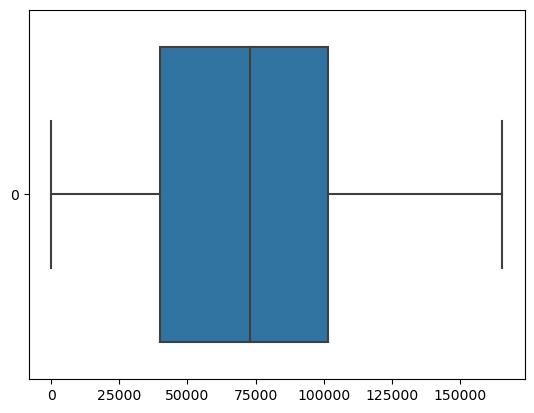

In [433]:
sns.boxplot(df['R&D Spend'], orient = 'h')         ## No outliers

<Axes: >

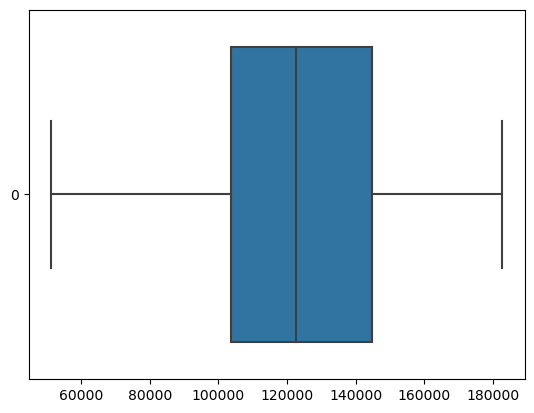

In [434]:
sns.boxplot(df['Administration'], orient = 'h')    

<Axes: >

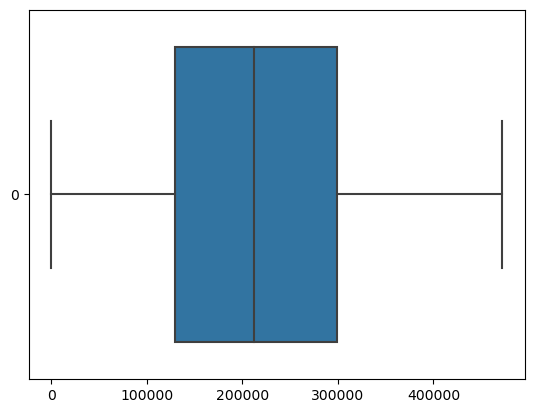

In [435]:
sns.boxplot(df['Marketing Spend'], orient = 'h')

<Axes: >

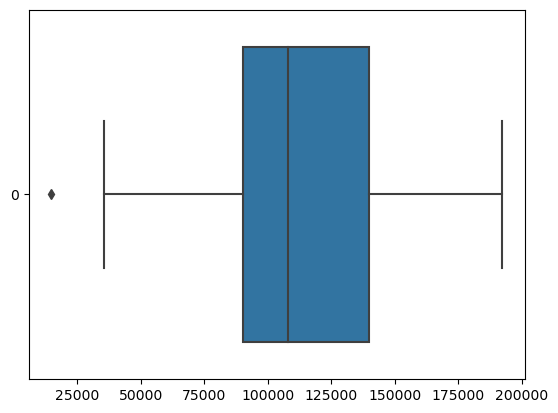

In [436]:
sns.boxplot(df['Profit'], orient = 'h')     ## There is one outlier detected in Profit variable and we remove it or 
                                            ## replace it with mean

## Treating the outlier

In [437]:
Q1 = df['Profit'].quantile(0.25)
print("First Quartile is :",round(Q1,2))

First Quartile is : 90138.9


In [438]:
Q2 = df['Profit'].quantile(0.5)
print("Second Quartile and Median is :",Q2)

Second Quartile and Median is : 107978.19


In [439]:
Q3 = df['Profit'].quantile(0.75)
print("Third Quartile is :",round(Q3,2))

Third Quartile is : 139765.98


In [440]:
# Inter Quartile Range
IQR = Q3-Q1
print("Inter Quartile Rangeis :", round(IQR,2))

Inter Quartile Rangeis : 49627.07


In [441]:
# Lower Threshold/Lower limit

LT = Q1-(1.5*IQR)
print("Lower Threshold value is :", round(LT, 2))

Lower Threshold value is : 15698.29


### Removing the Outlier

<Axes: >

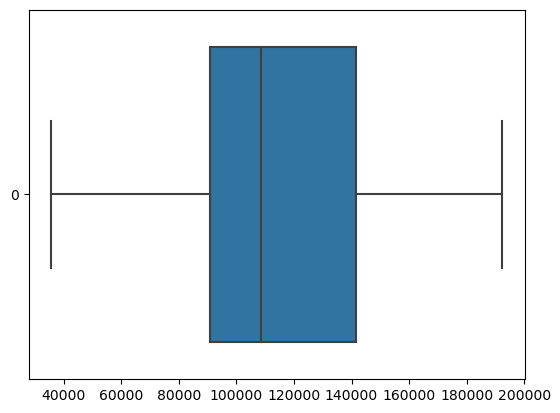

In [442]:
df = df[df['Profit'] > LT]             # It removed the outlier from dataset. Previously there were 50 rows.
df.shape
sns.boxplot(df['Profit'], orient = 'h') 

## EDA - Correlation Analysis and Data Visualization

In [443]:
df[['R&D Spend', 'Administration', 'Marketing Spend']].corr()    

,R&D Spend,Administration,Marketing Spend
R&D Spend,1.000000,0.243438,0.711654
Administration,0.243438,1.000000,-0.037280
Marketing Spend,0.711654,-0.037280,1.000000


### We can see there is high correlation between R&D Expenditure and Profits earned. So it can be said the for dollar 1 spending on R&D there is 97 cents profit earned.

In [444]:
df[['R&D Spend', 'Profit']].corr()

,R&D Spend,Profit
R&D Spend,1.000000,0.978437
Profit,0.978437,1.000000


<Axes: >

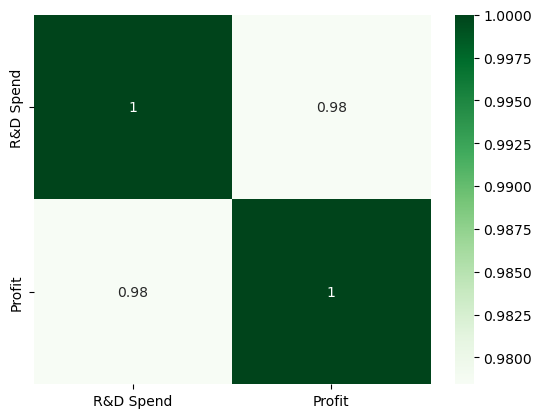

In [445]:
sns.heatmap(df[['R&D Spend', 'Profit']].corr(), annot = True, cmap='Greens')

In [446]:
df[['Administration', 'Profit']].corr()     ## Very low correlation. SO Administration expenditure will negatively affect Profit

,Administration,Profit
Administration,1.000000,0.205841
Profit,0.205841,1.000000


In [447]:
df[['Marketing Spend', 'Profit']].corr()     ## Moderately high correlation, so prediction using Marketing Spend will
                                             ## positively affect Profit

,Marketing Spend,Profit
Marketing Spend,1.000000,0.739307
Profit,0.739307,1.000000


### Dollar 1 spent on Marketing is increasing the profits by 74%

<Axes: >

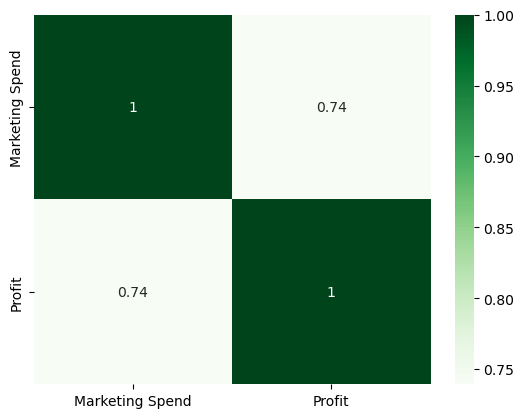

In [448]:
sns.heatmap(df[['Marketing Spend', 'Profit']].corr(), annot = True, cmap='Greens')

# Statistical Analysis

<Axes: xlabel='R&D Spend', ylabel='Profit'>

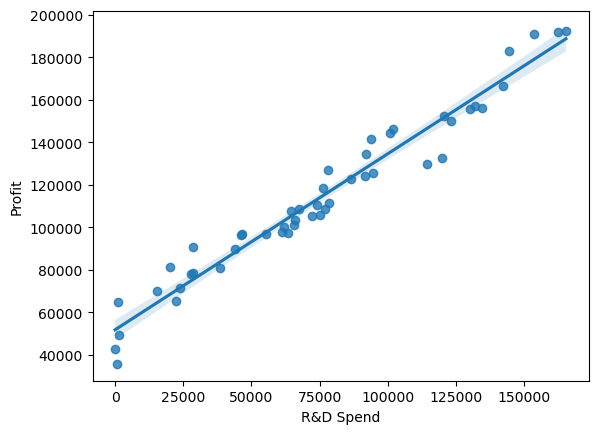

In [529]:
sns.regplot(df, x = df['R&D Spend'], y = df['Profit'])    ## Data is tightly scattered and have less residual error

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

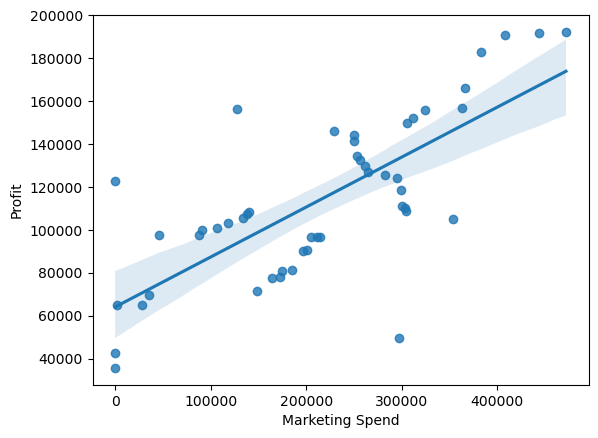

In [530]:
sns.regplot(df, x = df['Marketing Spend'], y = df['Profit'])     # Data is moderately scattered and have moderate residual error

<Axes: xlabel='Administration', ylabel='Profit'>

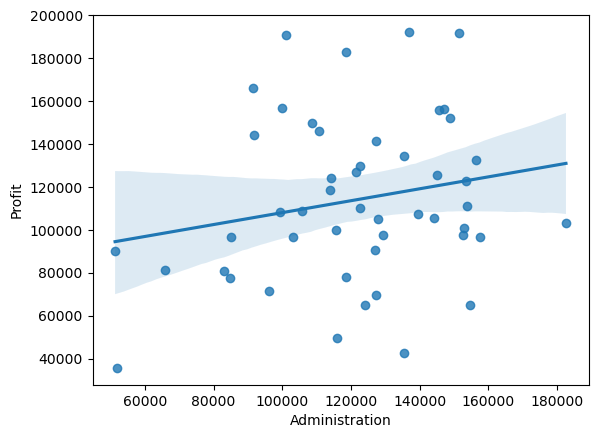

In [531]:
sns.regplot(df, x = df['Administration'], y = df['Profit'])       ## Data is highly scattered

# Data Visualization

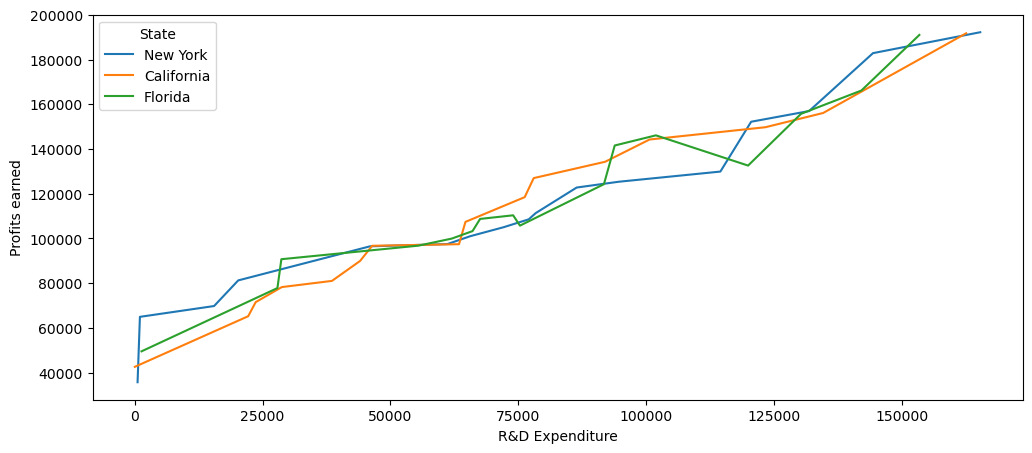

In [449]:
plt.subplots(figsize = (12,5))
sns.lineplot(data = df, x = 'R&D Spend', y = 'Profit', hue = 'State' )
plt.xlabel('R&D Expenditure')
plt.ylabel('Profits earned')
plt.show()

In [520]:
!pip install plotly
import plotly.express as px

In [524]:
px.scatter(df1, x = 'R&D Spend', y = 'Profit')
px.bar(df, x = 'State',y = 'Profit')

C:\Users\Rushikesh\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



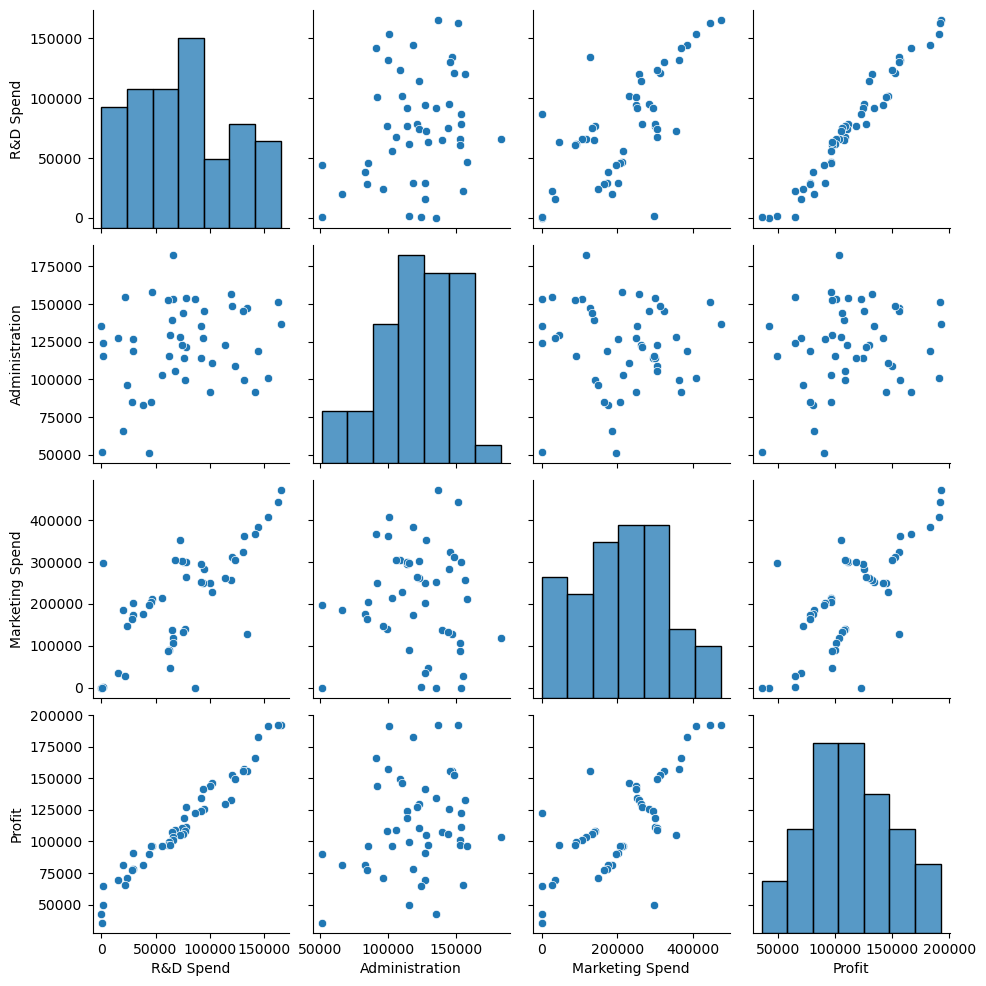

In [526]:
sns.pairplot(df)
plt.show()

## Dividing Dependent and Independent variables

In [453]:
dummy = pd.get_dummies(df['State']).astype('int')
dummy.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [454]:
df1 = pd.concat([df, dummy], axis = 1)
df1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


# Checking the distribution plot for each variable

C:\Users\Rushikesh\AppData\Local\Temp\ipykernel_6524\2672159471.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




The skewness of the variable is : 0.17


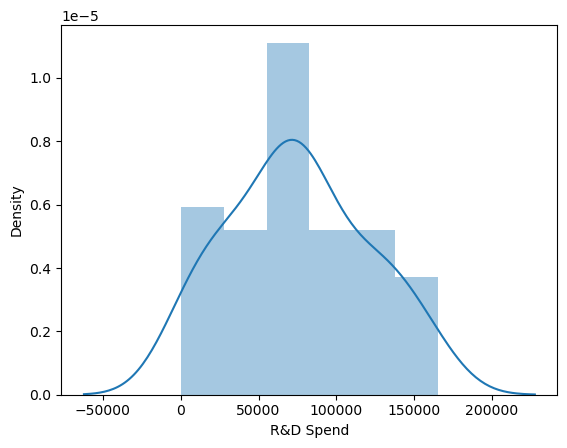

In [455]:
sns.distplot(df['R&D Spend'])

print("The skewness of the variable is :", round(df['R&D Spend'].skew(), 2))

In [458]:
log_R_M = np.sqrt(df1[['R&D Spend', 'Marketing Spend', 'California', 'New York', 'Florida']])
log_R_M

,R&D Spend,Marketing Spend,California,New York,Florida
0,406.631529,686.865416,0.0,1.0,0.0
1,403.234051,666.257105,1.0,0.0,0.0
2,391.716109,638.697534,0.0,0.0,1.0
3,379.963696,619.031195,0.0,1.0,0.0
4,376.971272,605.118517,0.0,0.0,1.0
5,363.148592,602.379747,0.0,1.0,0.0
6,366.899796,357.374901,1.0,0.0,0.0
7,360.968323,569.101643,0.0,0.0,1.0
8,347.192339,558.223333,0.0,1.0,0.0
9,351.190660,552.251410,1.0,0.0,0.0


The skewness of the variable is : -0.49


C:\Users\Rushikesh\AppData\Local\Temp\ipykernel_6524\2123561185.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




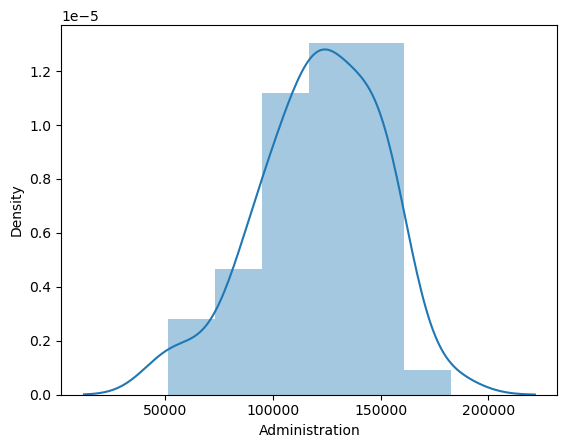

In [459]:
sns.distplot(df['Administration'])

print("The skewness of the variable is :", round(df['Administration'].skew(), 2))

In [460]:
log_Adm = np.log(df['Administration'])
log_A = log_Adm.drop(47)
log_A

0     11.826990
1     11.927533
2     11.524316
3     11.684117
4     11.422911
5     11.511071
6     11.899540
7     11.888138
8     11.909814
9     11.596155
10    11.613622
11    11.427265
12    11.754462
13    11.816691
14    11.961114
15    11.716820
16    11.708472
17    11.885024
18    11.645495
19    11.941548
20    11.642789
21    11.943236
22    11.718172
23    11.568843
24    11.505713
25    11.846201
26    11.878512
27    11.758727
28    12.115303
29    11.938403
30    11.658248
31    11.936243
32    11.769269
33    11.543042
34    11.968411
35    11.350964
36    11.752385
37    10.845117
38    11.096621
39    11.326380
40    11.683057
41    11.346998
42    11.474077
43    11.754948
44    11.949929
45    11.729270
46    11.659760
48    10.854047
Name: Administration, dtype: float64

C:\Users\Rushikesh\AppData\Local\Temp\ipykernel_6524\4208293916.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




The skewness of the variable is : -0.08


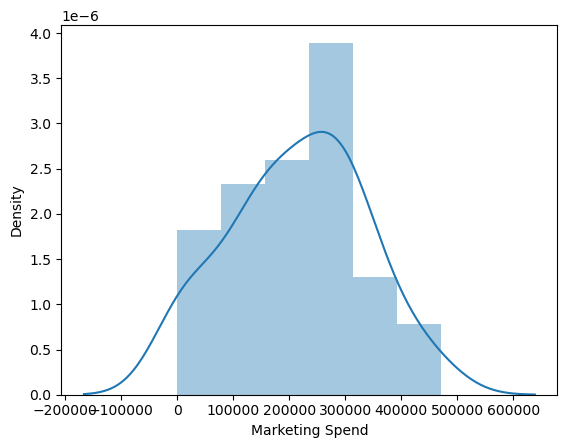

In [461]:
sns.distplot(df['Marketing Spend'])

print("The skewness of the variable is :", round(df['Marketing Spend'].skew(), 2))

C:\Users\Rushikesh\AppData\Local\Temp\ipykernel_6524\903766302.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




The skewness of the dependent variable is : 0.23


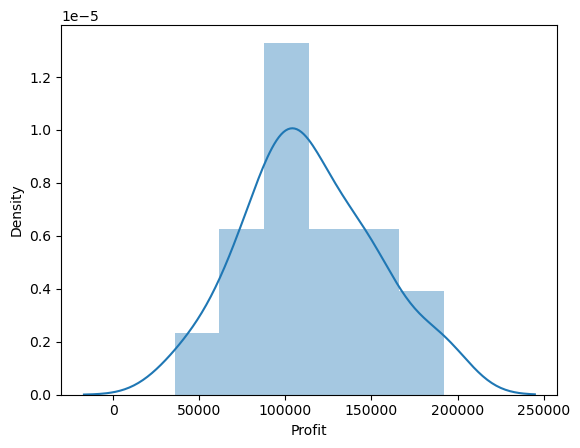

In [462]:
sns.distplot(df['Profit'])

print("The skewness of the dependent variable is :", round(df['Profit'].skew(), 2))

In [466]:
log_Pro = np.sqrt(df['Profit'])
log_Pro

0     438.476715
1     437.940704
2     437.093114
3     427.670422
4     407.661551
5     396.221049
6     395.123411
7     394.655039
8     390.143269
9     386.988320
10    382.259009
11    379.814955
12    376.278514
13    366.479672
14    364.146468
15    360.440064
16    356.360674
17    354.076785
18    352.515106
19    350.395291
20    344.200567
21    333.636059
22    332.193091
23    329.748374
24    329.472366
25    327.726014
26    325.166942
27    324.049857
28    321.375761
29    317.812272
30    316.129072
31    312.223574
32    312.134330
33    311.093105
34    310.986816
35    310.611510
36    301.178004
37    299.915221
38    285.007123
39    284.615109
40    279.713979
41    278.924416
42    267.392016
43    264.119253
44    255.343553
45    254.805965
46    222.465166
47    206.300097
48    188.874059
Name: Profit, dtype: float64

# Model Building

In [489]:
X = log_R_M
Y = log_Pro

In [534]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, random_state=544944496, shuffle=1)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(36, 5) (13, 5)
(36,) (13,)


C:\Users\Rushikesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning:

Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.



# Model fitting, Training and Learning

In [535]:
model = LinearRegression()
model_fit = model.fit(X_train, Y_train)

In [536]:
pred_train = model_fit.predict(X_train)
pred_train

array([416.45992609, 207.58530205, 331.94892574, 388.22180397,
       326.60969219, 367.57290297, 326.83523079, 288.01227676,
       384.94628662, 338.23428363, 346.96027564, 357.9728451 ,
       344.27440029, 405.93290132, 328.55710208, 379.1377198 ,
       403.52781694, 189.63357918, 202.2323952 , 331.60173086,
       344.62518654, 313.1144045 , 274.3073895 , 319.92224388,
       312.83420188, 394.31481056, 344.36273915, 334.66427651,
       349.35366892, 341.02616653, 347.91195077, 302.16426753,
       282.58251235, 216.88813481, 309.8642199 , 386.56602034])

In [538]:
print("R2 Score of LR training model is :", round(r2_score(Y_train, pred_train),2))

R2 Score of LR training model is : 0.93


In [539]:
pred = model_fit.predict(X_test)
pred

array([271.68851232, 360.2801056 , 419.05381555, 284.73589674,
       259.65042826, 364.27442833, 397.43517244, 279.00906584,
       363.5646448 , 390.52675901, 357.10155559, 379.29970235,
       323.41536823])

In [540]:
print("R2 Score of LR testing model is :", round(r2_score(Y_test, pred),2))
print("MAE of LR testing model is : ", round(mean_absolute_error(Y_test, pred),2))
print("MSE of LR testing model is : ", round(mean_squared_error(Y_test, pred),2))
print("Sqrt(MSE) of LR testing model is : ", round(sqrt(mean_squared_error(Y_test,pred)),2))

R2 Score of LR testing model is : 0.95
MAE of LR testing model is :  11.35
MSE of LR testing model is :  159.78
Sqrt(MSE) of LR testing model is :  12.64


<Axes: xlabel='Profit'>

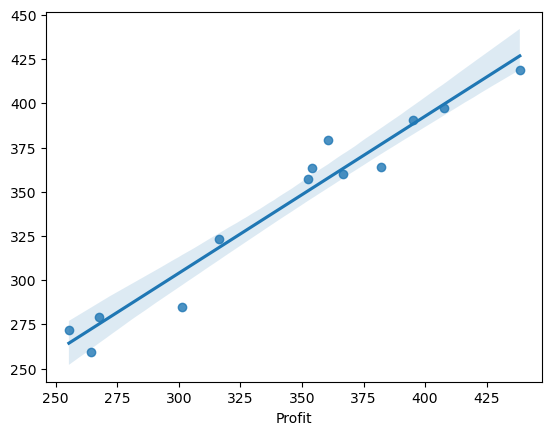

In [541]:
sns.regplot(df1, x = Y_test, y = pred)

# Model was underfitting itself and there after with the use of Square root transformation I could reduce MSE and RMSE to accpetable level.

In [542]:
sc = StandardScaler()

In [543]:
x_sc = sc.fit_transform(X, Y)
x_sc

array([[ 1.51873981e+00,  1.50511192e+00, -6.96310624e-01,
         1.37198868e+00, -6.96310624e-01],
       [ 1.48457230e+00,  1.38407120e+00,  1.43614066e+00,
        -7.28868987e-01, -6.96310624e-01],
       [ 1.36873950e+00,  1.22220299e+00, -6.96310624e-01,
        -7.28868987e-01,  1.43614066e+00],
       [ 1.25054868e+00,  1.10669484e+00, -6.96310624e-01,
         1.37198868e+00, -6.96310624e-01],
       [ 1.22045469e+00,  1.02498022e+00, -6.96310624e-01,
        -7.28868987e-01,  1.43614066e+00],
       [ 1.08144376e+00,  1.00889434e+00, -6.96310624e-01,
         1.37198868e+00, -6.96310624e-01],
       [ 1.11916859e+00, -4.30115532e-01,  1.43614066e+00,
        -7.28868987e-01, -6.96310624e-01],
       [ 1.05951739e+00,  8.13438939e-01, -6.96310624e-01,
        -7.28868987e-01,  1.43614066e+00],
       [ 9.20976070e-01,  7.49546347e-01, -6.96310624e-01,
         1.37198868e+00, -6.96310624e-01],
       [ 9.61186104e-01,  7.14470891e-01,  1.43614066e+00,
        -7.28868987e-01

In [545]:
x_train, x_test, y_train, y_test = train_test_split(x_sc, Y, train_size=0.75, random_state=1234, shuffle=1)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(36, 5) (36,)
(13, 5) (13,)


C:\Users\Rushikesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning:

Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.



In [546]:
model_sc = LinearRegression()
model_sc_fit = model_sc.fit(x_train, y_train)
pred_sc = model_sc_fit.predict(x_test)

In [547]:
pred_sc

array([387.98189227, 207.25485158, 381.74163301, 278.82508462,
       336.1666984 , 273.28803719, 399.46471117, 331.00840823,
       360.35714198, 359.03244548, 286.34276148, 263.9336168 ,
       366.4930681 ])

In [548]:
print("R2 Score of SC testing model is :", round(r2_score(y_test, pred_sc),2))
print("MAE of SC testing model is : ", round(mean_absolute_error(y_test, pred_sc),2))
print("MSE of SC testing model is : ", round(mean_squared_error(y_test, pred_sc),2))
print("Sqrt(MSE) of SC testing model is : ", round(sqrt(mean_squared_error(y_test,pred_sc)),2))

R2 Score of SC testing model is : 0.95
MAE of SC testing model is :  11.76
MSE of SC testing model is :  178.16
Sqrt(MSE) of SC testing model is :  13.35


<Axes: xlabel='Profit'>

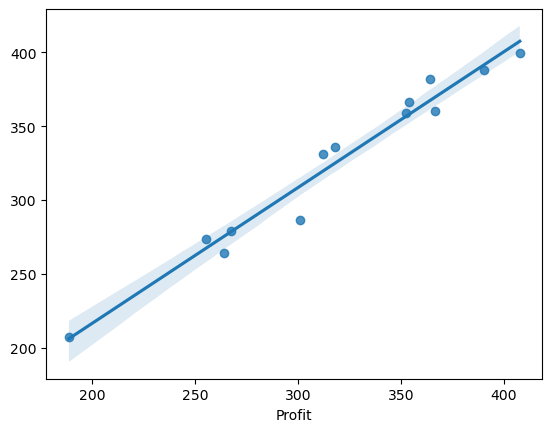

In [549]:
sns.regplot(df1, x = y_test, y = pred_sc)    ## Residual error has been reduced and so does MSE and RMSE.

# Conclusion = R2 score of LR using sqrt transformation after adjusting the skewness is 95% and using scalar adjustment it is 95%.

# This prediction model can be used for Future predictions.